In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import coherence,periodogram
import sys
sys.path.append('../utils/')
from series_plot import plot_multi_series

In [2]:
data = pd.read_csv('../data/sample_data.csv')

In [3]:
data.keys()

Index(['[c]Ring No.', 'Unnamed: 1', '[9] Total Thrust Force', 'Soil Press Ave',
       '[2495] Cutter Torque', '[2496] [c]Screw Torque',
       '[46] No.2 Shield Jack Speed'],
      dtype='object')

In [4]:
d_js = np.array(list(map(float, data['[46] No.2 Shield Jack Speed'].tolist()[1:1300])))
d_sp = np.array(list(map(float, data['Soil Press Ave'].tolist()[1:1300])))
d_st = np.array(list(map(float, data['[2496] [c]Screw Torque'].tolist()[1:1300])))
d_tf = np.array(list(map(float, data['[9] Total Thrust Force'].tolist()[1:1300])))

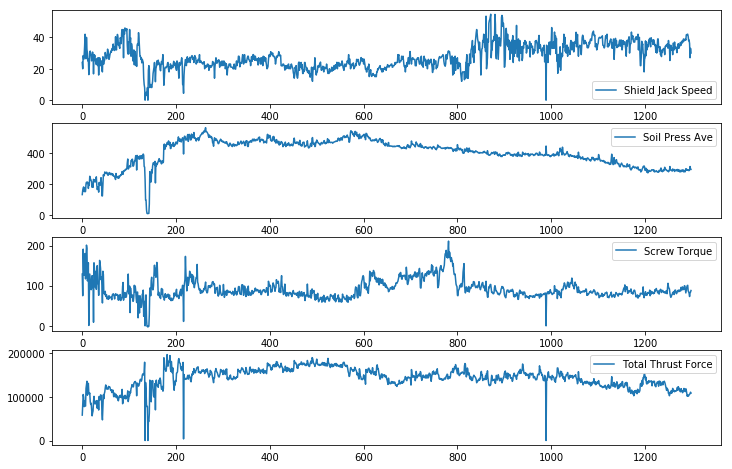

1

In [5]:
plot_multi_series([d_js,d_sp,d_st,d_tf],title_names=["Shield Jack Speed",
                                                     'Soil Press Ave',
                                                     'Screw Torque',
                                                    'Total Thrust Force'])

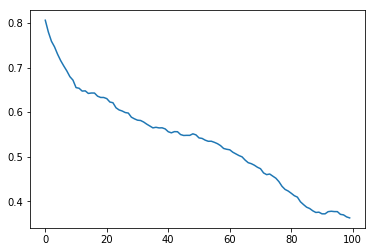

In [6]:
ccf1 = sm.tsa.stattools.ccf(d_sp,d_tf,unbiased=False)
plt.plot(ccf1[:100])

In [7]:
d_js_diff = d_js-np.roll(d_js,1)

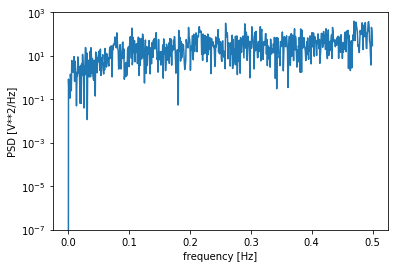

In [9]:
f, Pxx_den = periodogram(d_js_diff)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e3])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

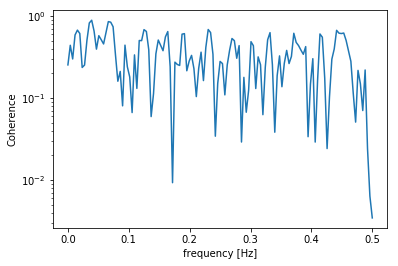

In [13]:
f, Cxy = coherence(d_sp, d_tf,fs=1)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()

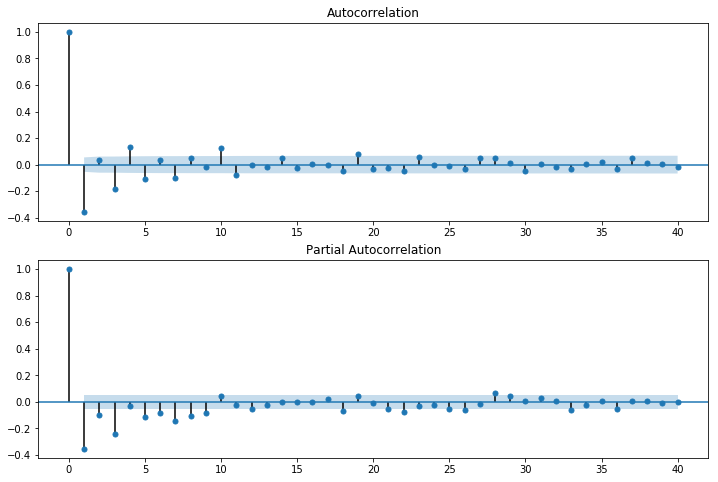

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(d_js_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(d_js_diff, lags=40, ax=ax2)

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):   
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput )

In [16]:
test_stationarity(d_js_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.031829e+01
p-value                        3.056030e-18
#Lags Used                     2.100000e+01
Number of Observations Used    1.277000e+03
Critical Value (1%)           -3.435481e+00
Critical Value (5%)           -2.863806e+00
Critical Value (10%)          -2.567976e+00
dtype: float64


In [17]:
arma_mod20 = sm.tsa.ARMA(d_js_diff, (2,2)).fit(disp=False)
print(arma_mod20.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1299
Model:                     ARMA(2, 2)   Log Likelihood               -3667.109
Method:                       css-mle   S.D. of innovations              4.071
Date:                Mon, 25 Mar 2019   AIC                           7346.218
Time:                        16:05:31   BIC                           7377.234
Sample:                             0   HQIC                          7357.856
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.026      0.205      0.837      -0.045       0.056
ar.L1.y       -0.3604      0.064     -5.659      0.000      -0.485      -0.236
ar.L2.y        0.4415      0.037     11.920      0.0

In [18]:
resid = arma_mod20.resid

In [19]:
 print (len(arma_mod20.predict(0,1000)))

1001


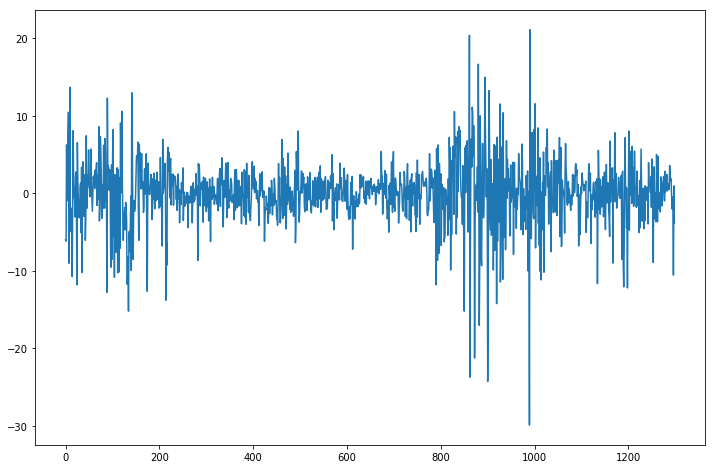

In [20]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = plt.plot(resid);

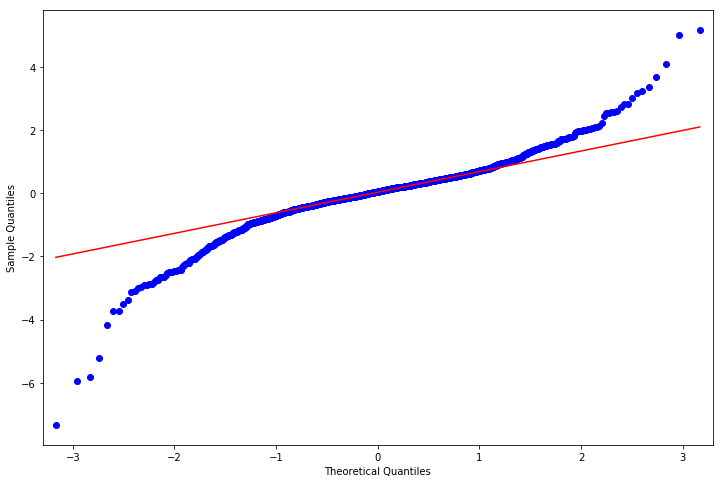

In [21]:
from statsmodels.graphics.api import qqplot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [22]:
d_js_raw = np.array(list(map(float, data['[46] No.2 Shield Jack Speed'].tolist()[1:])))
d_js_diff_raw =  d_js_raw-np.roll(d_js_raw,1)

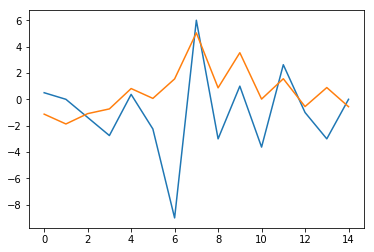

In [25]:

start,end = 1290,1305
plt.plot(d_js_diff_raw[start:end])
plt.plot(arma_mod20.predict(0,1500,dynamic=False)[start:end])
plt.show()

In [169]:
arma_mod20.predict(1200,1305,dynamic=False)

array([23.84725876, 26.79835408, 33.38037612, 31.00485784, 33.31154089,
       32.97588566, 33.2512266 , 34.13860022, 33.55383456, 35.81639311,
       37.18357535, 37.73221921, 35.871261  , 33.77567797, 36.62044589,
       37.29790543, 36.92646224, 36.6349315 , 35.20743497, 36.33317563,
       37.00126213, 35.79390482, 34.36214782, 34.21084383, 31.58110256,
       32.73444408, 31.17779802, 32.07487852, 36.18187165, 37.66082769,
       34.51771227, 33.14712165, 31.50374638, 32.37066973, 30.33421506,
       30.02479034, 28.71588436, 30.23981699, 30.54668542, 31.23555603,
       31.82713845, 32.19261698, 32.01200795, 29.85355435, 31.92527873,
       33.33199116, 33.84280901, 34.13860022, 33.84621739, 34.57547028,
       33.33795582, 35.33828868, 35.02597384, 34.13860022, 28.43713504,
       30.08510463, 33.54701781, 32.38430324, 31.49692962, 32.08169528,
       30.03842385, 33.09481005, 35.09310489, 32.68009445, 34.42075792,
       33.77993844, 33.07317385, 32.67327769, 32.01200795, 30.58